## Correlation: &thinsp; DOC and relative humidity (hur)

In [253]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import skimage.measure as skm
import seaborn as sns
import scipy
from scipy import stats

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *

plt.rcParams['figure.figsize'] = [10, 7.5]

In [254]:
variable = 'hur'

data_options= [
    'hur'
    ]

org_options= [
    'rome'
    # 'ni'
    ]

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3  no wap data
    # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6  only monthly wap
    # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4 (different calendar)
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6 (different calendar)
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    'NESM3'           # 14
    ]
datasets = models_cmip5 + models_cmip6

timescales = [
    # 'daily',
    'monthly'
    ]

experiments = [
    'historical',
    # 'rcp85',
    # 'ssp585'
    ]

resolutions = [
    # 'original',
    'regridded'
    ]

print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable +'_vMean', datasets[0], experiments[0], home, resolutions[0], timescales[0])
ds

variable:hur, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, lat, lon) float64 ...
Attributes:
    units:        %
    Description:  weighted mean relative humidity from 1000-5 hpa

In [255]:
data = ds[variable]
data

<xarray.DataArray 'hur' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float64]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:        %
    Description:  weighted mean relative humidity from 1000-5 hpa

In [256]:
org = get_metric(org_options[0], datasets[0], experiments[0], home, resolutions[0])[org_options[0]].resample(time='M').mean(dim='time', keep_attrs=True)
org = org.assign_coords(time=data.time)
org

<xarray.DataArray 'rome' (time: 360)>
array([ 661205.74862036,  812377.23024994,  536573.99766574,
        524100.67619505,  545629.17572837,  668433.58506345,
        861908.88182009,  625181.48148557,  892848.43394233,
        610070.52012931,  537621.25895735,  556792.74063709,
        766647.00629548,  771802.07295113,  730120.01216126,
        489775.84741502,  586698.14495853,  706976.71367347,
        778616.39659419,  653882.64737309,  528594.32623666,
        502136.28462803,  521969.86484699,  576397.48590795,
        782994.48633935,  572806.74032178,  622675.84909279,
        492165.60895256,  507146.07598355,  620340.44698179,
        584356.0506255 ,  585283.26910157,  591114.88106404,
        571443.29002638,  533478.42245313,  656728.26807138,
        742847.98047096,  680062.66089585,  599464.08226704,
        527611.37838314,  519945.20653261,  593841.75445205,
        657510.88990398,  759153.31748424,  690842.15924368,
        605686.01635462,  503548.8916349 ,  510421.83153587,
        746375.14022651,  717732.1421102 ,  595066.15289212,
        595995.69848168,  507272.62813341,  566323.39075092,
        663064.38342127,  658315.6569055 ,  529852.92221184,
        528389.39645255,  503359.5720419 ,  620404.13475657,
...
        646228.25408628,  644376.57065982,  503938.07233847,
        450329.42481591,  502933.72195409,  596232.78723265,
        598358.92701829,  655837.39013237,  562115.97133634,
        525365.32453783,  548009.67382626,  603134.79976097,
        734629.18573665,  827833.20992299,  574679.86009763,
        499784.43815671,  509073.21204514,  652365.87570045,
        774914.42294391,  798810.48352092,  737443.9747138 ,
        537254.64019643,  518070.31196118,  596211.26558479,
        754161.26835059,  658705.47704768,  744293.23580084,
        608155.49038581,  517977.84269896,  624145.3316308 ,
        659851.27308755,  679575.33326128,  542172.05733555,
        626785.57975381,  456288.80787414,  548260.92690757,
        670394.44724536,  788132.39159302,  470848.9166643 ,
        494249.81293297,  497346.69790155,  655353.09306825,
        668890.68669066,  604700.1128351 ,  626484.82618592,
        534002.8956277 ,  502341.11295255,  639250.9709951 ,
        688545.44332653,  704333.38375505,  592508.81763148,
        511787.20400276,  518256.88199429,  653868.75655504,
        754307.50188041,  743883.25505561,  561247.08601629,
        588097.50817186,  496613.60774   ,  601711.95295617])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
Attributes:
    units:    km²

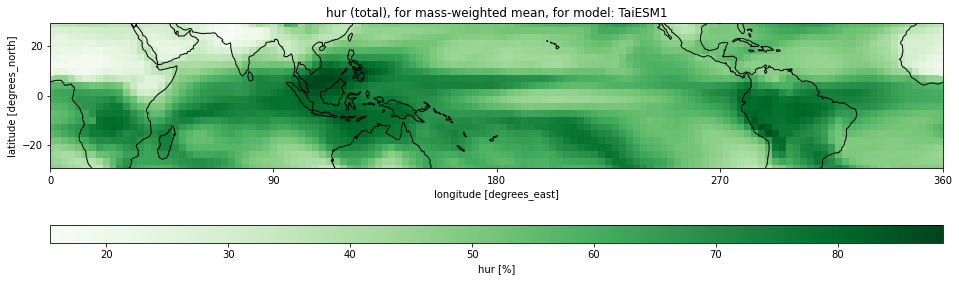

In [257]:
scene = data.isel(time=0)
title = '{} ({}), for mass-weighted mean, for model: {}'.format(variable, regions[0], datasets[0])
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

In [258]:
def pick_region(data, dataset, experiment = 'historical', region = 'descent'):
    wap = get_dsvariable('wap500', dataset, experiment)['wap500']
    if 'time' in data.dims:
        wap = wap.assign_coords(time=data.time)
    else:
        wap = wap.mean(dim='time')

    if region == 'descent':
        data = data.where(wap>0)
    elif region == 'total':
        pass
    elif region == 'ascent':
        data = data.where(wap<0)
    return data

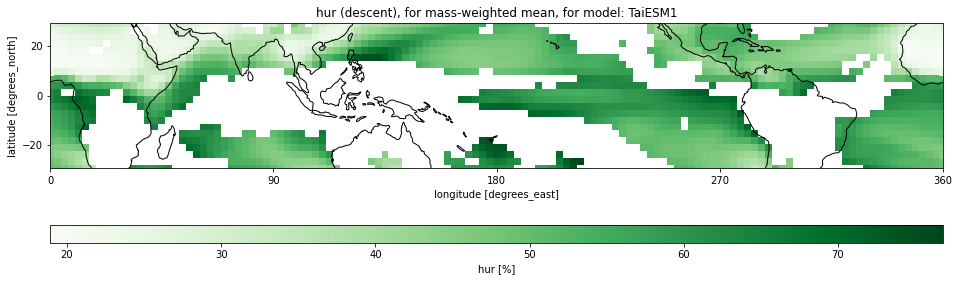

In [259]:
regions = [
    # 'total',
    'descent',
    # 'ascent'
    ]

data = get_dsvariable(variable +'_vMean', datasets[0], 'ssp585', home, resolutions[0], timescales[0])[variable]
data_region = pick_region(data, datasets[0], experiments[0], regions[0])
scene = data_region.isel(time=0)
title = '{} ({}), for mass-weighted mean, for model: {}'.format(variable, regions[0], datasets[0])
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

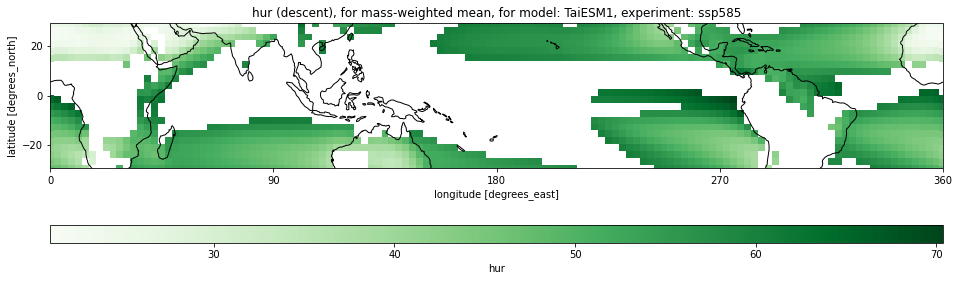

In [260]:
data = get_dsvariable(variable +'_vMean', datasets[0], 'ssp585', home, resolutions[0], timescales[0])[variable]
scene = data.mean(dim = 'time')
scene = pick_region(scene, datasets[0], 'ssp585', regions[0])

title = '{} ({}), for mass-weighted mean, for model: {}, experiment: {}'.format(variable, regions[0], datasets[0], 'ssp585')
cmap = 'Greens'
plot_scene(scene, cmap=cmap, title=title)

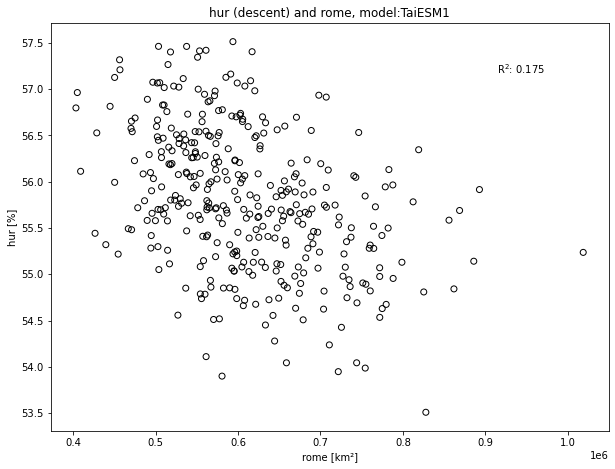

In [261]:
timeMean_options = [
    # 'annual',
    'monthly'
    ]

x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
y = data.weighted(aWeights).mean(dim=('lat','lon')) 

fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax)
plt.title('{} ({}) and {}, model:{}'.format(data_options[0], regions[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], '%'))
plt.show()

### comparing datasets

In [274]:
regions = [
    'total',
    # 'descent',
    # 'ascent'
    ]

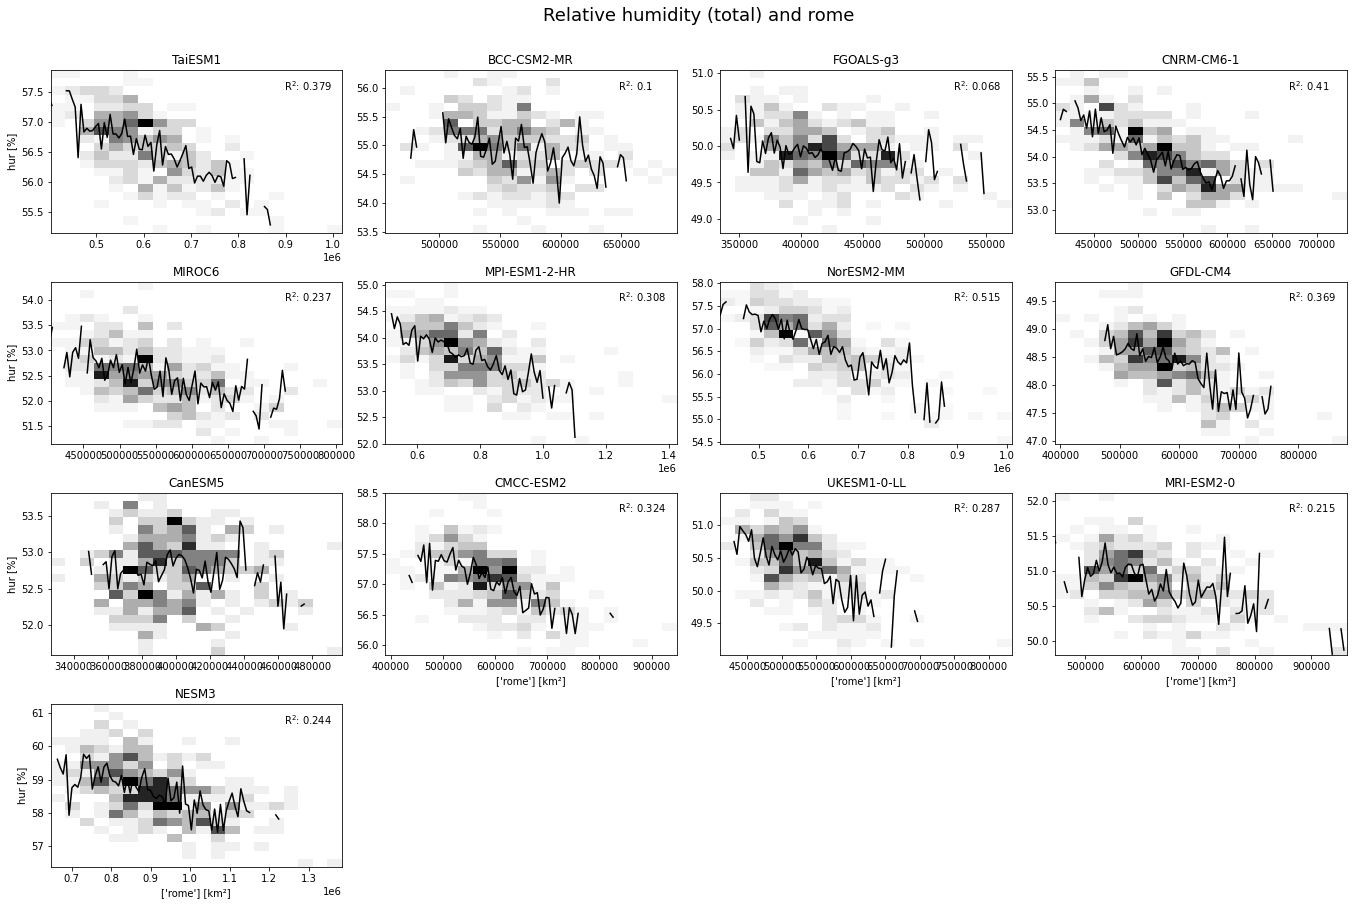

In [275]:
timeMean_options = [
    # 'annual',
    'monthly',
    ]

absolute_xlimits = False
quantile_low = 0
quantile_high = 1
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:
        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = resample_timeMean(org, timeMean_options[0])

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))
    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
        data = pick_region(data, dataset, experiments[0], regions[0])
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon')) 
        y = resample_timeMean(y, timeMean_options[0])
        y = y.assign_coords(time=x.time)
        
        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))
    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} ({}) and {}'.format('Relative humidity', regions[0], org_options[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = resample_timeMean(org, timeMean_options[0])

    data = get_dsvariable(variable +'_vMean', dataset, experiments[0], resolution=resolutions[0])[variable]
    data = pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    y = data.weighted(aWeights).mean(dim=('lat','lon')) 
    y = resample_timeMean(y, timeMean_options[0])
    y = y.assign_coords(time=x.time)


    # plot_scatter(x, y , ax)
    
    plt.hist2d(x,y,[20,20], cmap ='Greys') #, vmin=0, vmax=300)
    plot_bins(x,y, ax)

    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options, org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], '%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

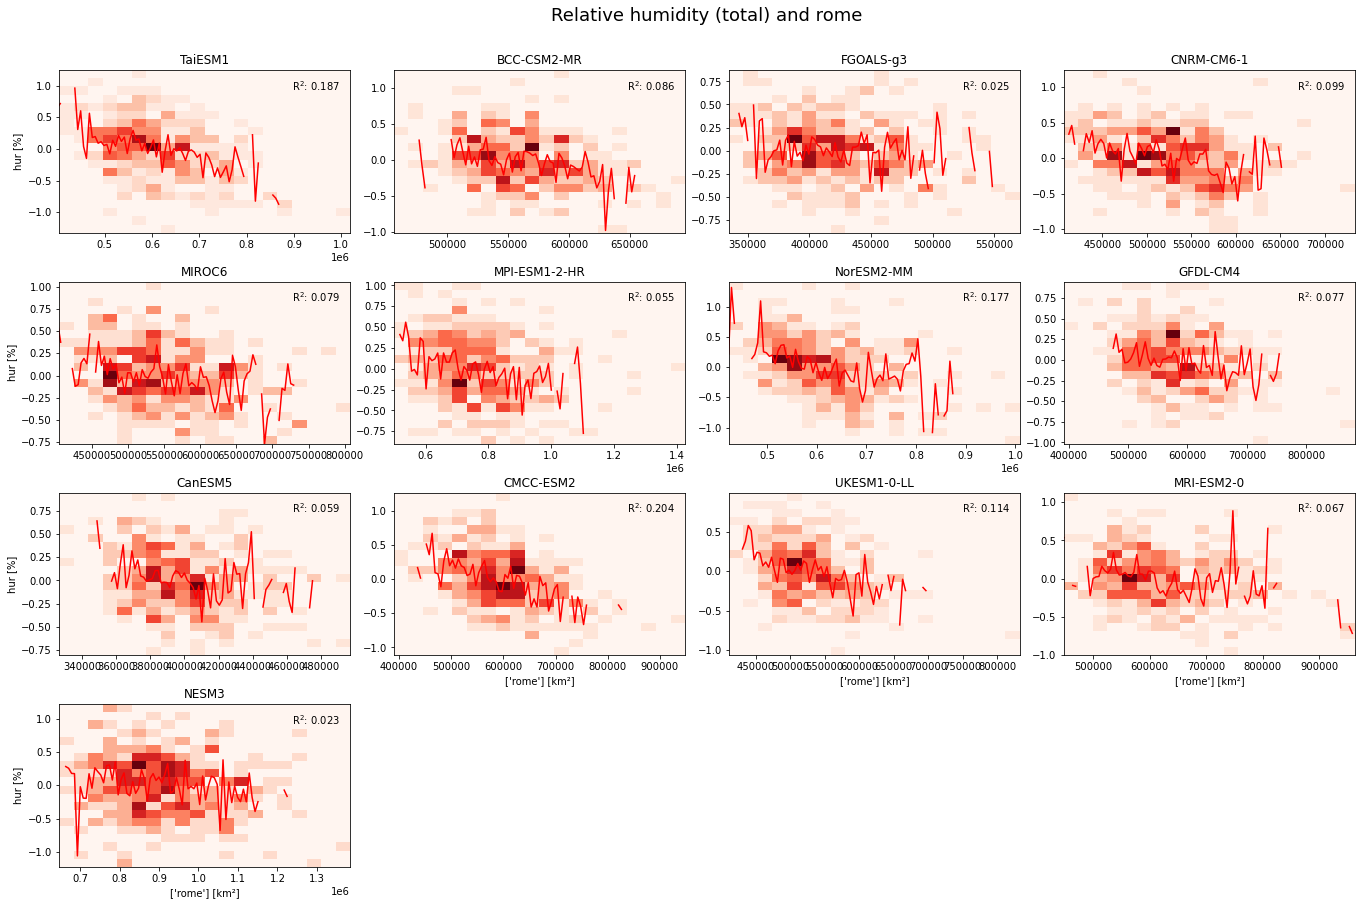

In [276]:
timeMean_options = [
    # 'annual',
    'monthly',
    ]

absolute_xlimits = False
quantile_low = 0
quantile_high = 1
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:
        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = resample_timeMean(org, timeMean_options[0])

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))
    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
        data = pick_region(data, dataset, experiments[0], regions[0])
        aWeights = np.cos(np.deg2rad(data.lat))
        f = data.weighted(aWeights).mean(dim=('lat','lon')) 
        f = resample_timeMean(f, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        y = f.groupby('time.month') - climatology 

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))
    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} ({}) and {}'.format('Relative humidity', regions[0], org_options[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = resample_timeMean(org, timeMean_options[0])

    data = get_dsvariable(variable +'_vMean', dataset, experiments[0], resolution=resolutions[0])[variable]
    data = pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    f = data.weighted(aWeights).mean(dim=('lat','lon')) 
    f = resample_timeMean(f, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    y = f.groupby('time.month') - climatology 
    y = y.assign_coords(time=x.time)

    # plot_scatter(x, y , ax)
    
    plt.hist2d(x,y,[20,20], cmap = 'Reds')
    plot_bins(x,y, ax, 'r')

    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options, org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], '%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

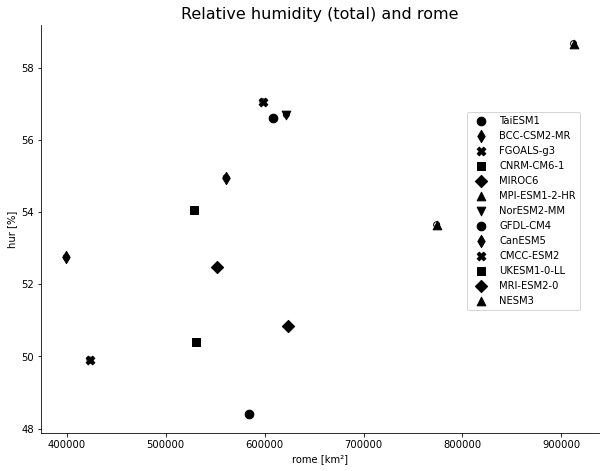

In [277]:
order, colors = orderByTas(False, datasets, experiments[0], resolutions[0])

x= []
y= []
for dataset in datasets:
    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x_data = org.mean(dim=('time'))
    x = np.append(x, x_data)

    data = get_dsvariable(variable +'_vMean', dataset, experiments[0], resolution=resolutions[0])[variable]
    data = pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('lat', 'lon')).mean(dim='time')
    y = np.append(y, y_data)

fig, ax = plt.subplots()
title = '{} ({}) and {}'.format('Relative humidity', regions[0], org_options[0])
xlabel = '{} [{}]'.format(org_options[0], org.units)
ylabel = '{} [{}]'.format(data_options[0], '%')

plot_scatter(x,y,ax)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.975,0.8))

sns.despine(top=True, right=True, left=False)
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

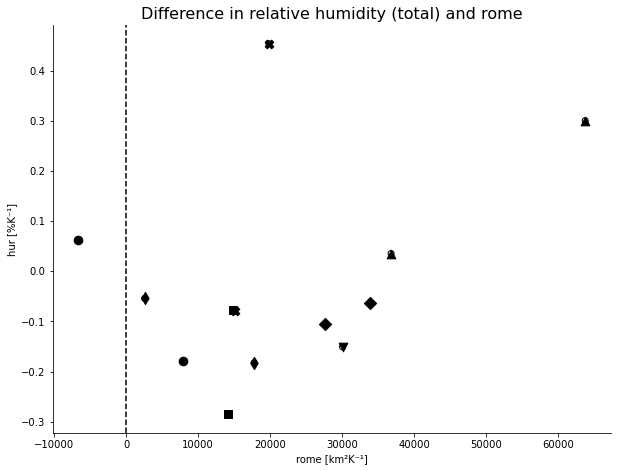

In [278]:
order, colors = orderByTasdiff(False, datasets, models_cmip5, resolutions[0])

x= []
y= []
for dataset in datasets:
    x_historical = get_metric(org_options[0], dataset, experiment = 'historical', resolution=resolutions[0])[org_options[0]].mean(dim=('time'))
    x_rcp = get_metric(org_options[0], dataset, experiment = 'ssp585', resolution=resolutions[0])[org_options[0]].mean(dim=('time'))
    xdiff = x_rcp - x_historical

    fractional_change = False
    if fractional_change:
        xdiff = (xdiff/x_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        xdiff = xdiff/tasdiff
    x = np.append(x, xdiff)


    data = get_dsvariable(variable +'_vMean', dataset, experiment='historical')[variable]
    data = pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')

    data = get_dsvariable(variable +'_vMean', dataset, experiment='ssp585')[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    data = pick_region(data, dataset, experiments[0], regions[0])
    data_rcp = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')
    datadiff = data_rcp - data_historical

    fractional_change = False
    if fractional_change:
        datadiff = (datadiff/data_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff
    y = np.append(y, datadiff)


fig, ax = plt.subplots()
title = 'Difference in {} ({}) and {}'.format('relative humidity', regions[0], org_options[0])
xlabel = '{} [{}]'.format(org_options[0], org.units + 'K' + chr(0x207B) + chr(0x00B9))
ylabel = '{} [{}]'.format(data_options[0], '%' + 'K' + chr(0x207B) + chr(0x00B9))

plot_scatter(x,y,ax)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    # plt.legend(bbox_to_anchor=(0.975,0.55))

sns.despine(top=True, right=True, left=False)
plt.axvline(0, color= 'k',  linestyle="--")
# plt.axhline(0, color= 'k',  linestyle="--")
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()